# Explore here

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv")

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [60]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [61]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


To properly apply the linear regression algorithm to the dataset, we have to transform the categorical variables into numerical variables.

In [62]:
df["sex"] = df["sex"].replace({"female": 1, "male": 0})

/tmp/ipykernel_493/4143609771.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["sex"] = df["sex"].replace({"female": 1, "male": 0})


In [63]:
df["smoker"] = df["smoker"].replace({"yes": 1, "no": 0})

/tmp/ipykernel_493/2179532465.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smoker"] = df["smoker"].replace({"yes": 1, "no": 0})


In [64]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [65]:
df["region"] = df["region"].replace({"southwest": 1, "southeast": 2,"northwest": 3, "northeast": 4})

/tmp/ipykernel_493/625725082.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["region"] = df["region"].replace({"southwest": 1, "southeast": 2,"northwest": 3, "northeast": 4})


In [66]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [68]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


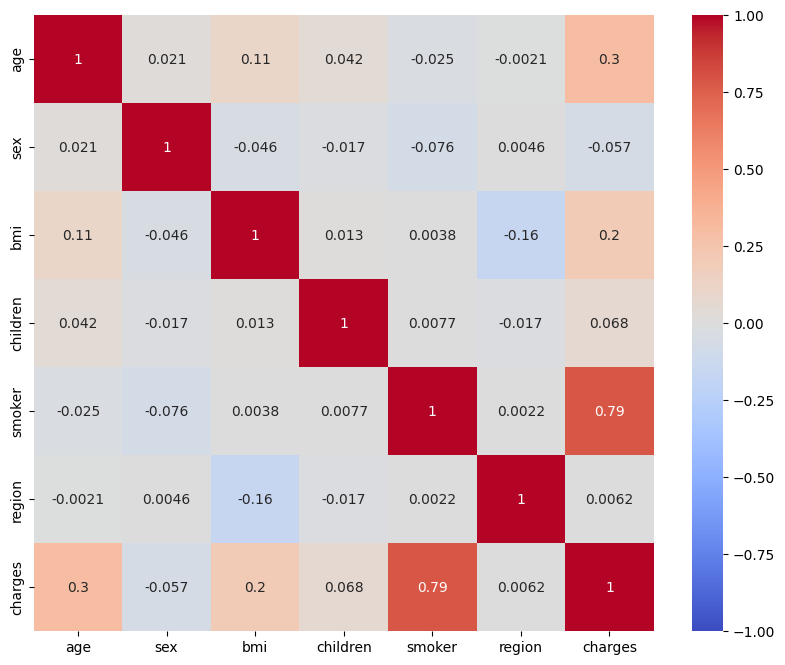

In [69]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), vmin = -1, vmax = 1, annot = True, cmap='coolwarm')
plt.show()

The table provided is a correlation matrix showing the pairwise correlations between variables, including the objective variable 'charges' and other predictor variables. Here's the interpretation of the relationships:

- age and charges: The correlation coefficient is 0.3, indicating a weak positive relationship. As age increases, insurance charges tend to increase slightly.

- sex and charges: The correlation coefficient is -0.057, suggesting a very weak negative relationship. The impact of sex on charges is negligible.

- bmi and charges: The correlation coefficient is 0.2, indicating a weak positive relationship. Higher BMI is associated with slightly higher charges.

- children and charges: The correlation coefficient is 0.068, showing a very weak positive relationship. The number of children has minimal impact on charges.

- smoker and charges: The correlation coefficient is 0.79, indicating a strong positive relationship. Being a smoker is strongly associated with higher insurance charges.

- region and charges: The correlation coefficient is 0.0062, suggesting almost no relationship. The region has virtually no impact on charges.

Key Takeaways:
- Strongest Predictor: 'smoker' has the strongest influence on 'charges'.

- Weak Predictors: 'age' and 'bmi' have modest positive effects.

- Negligible Predictors: 'sex', 'children', and 'region' have little to no impact on 'charges'.

This suggests that smoking status is the most significant factor in determining insurance charges, while other variables play minor or insignificant roles.

In [71]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
X_train = df_train.drop('charges', axis=1).reset_index(drop= True)
y_train = df_train['charges'].reset_index(drop= True)
X_test = df_test.drop('charges', axis=1).reset_index(drop= True)
y_test = df_test['charges'].reset_index(drop= True)

In [72]:
X_train.head()

,age,sex,bmi,children,smoker,region
0,46,1,19.95,2,0,3
1,47,1,24.32,0,0,4
2,52,1,24.86,0,0,2
3,39,1,34.32,5,0,2
4,54,1,21.47,3,0,3


In [73]:
y_train.head()

0     9193.83850
1     8534.67180
2    27117.99378
3     8596.82780
4    12475.35130
Name: charges, dtype: float64

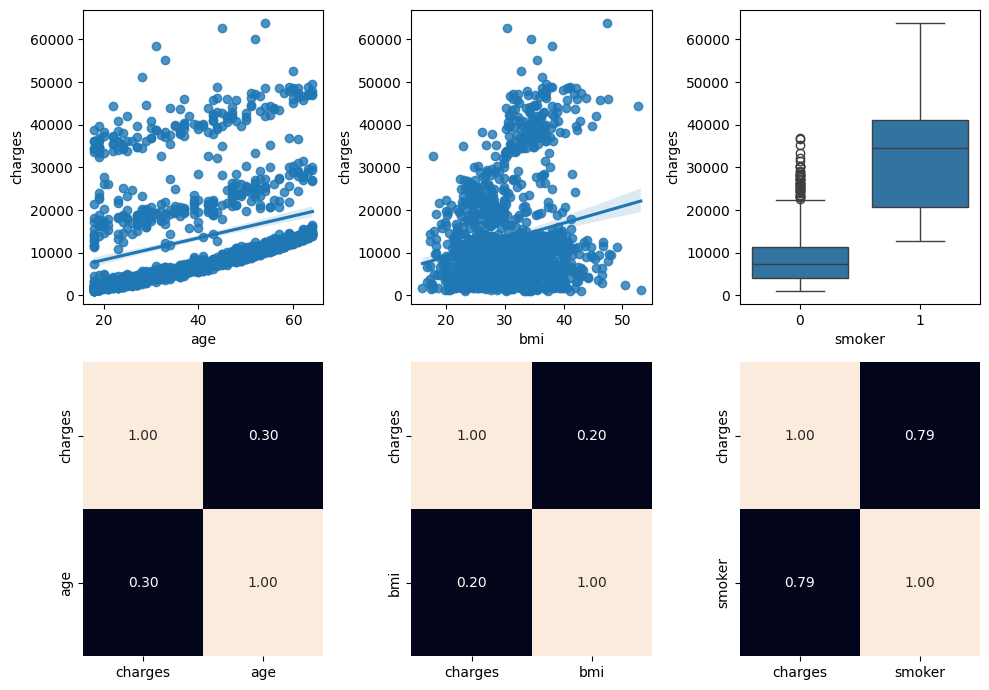

In [87]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7))
total_data = pd.concat([df_train, df_test])

sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)
sns.boxplot(ax = axis[0, 2], data = total_data, x = "smoker", y = "charges")
sns.heatmap(total_data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2], cbar = False)

plt.tight_layout()

plt.show()

In [75]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [76]:
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

Intercept (a): -13050.535088002527
Coefficients (b): [2.57056264e+02 1.87914567e+01 3.35781491e+02 4.25091456e+02
 2.36478181e+04 2.71284266e+02]


In [77]:
y_pred = model.predict(X_test)
y_pred

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

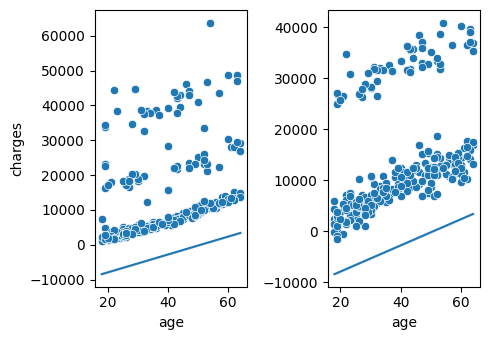

In [92]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([df_train, df_test])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: -13050.535088002527 + 2.57056264e+02 * x

sns.scatterplot(ax = axis[0], data = df_test, x = "age", y = "charges")
sns.lineplot(ax = axis[0], x = df_test["age"], y = regression_equation(df_test["age"]))
sns.scatterplot(ax = axis[1], x = df_test["age"], y = y_pred)
sns.lineplot(ax = axis[1], x = df_test["age"], y = regression_equation(df_test["age"])).set(ylabel = None)

plt.tight_layout()

plt.show()

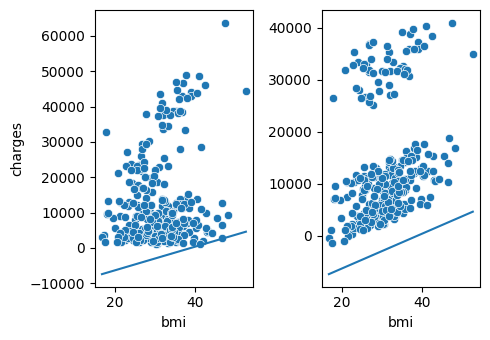

In [86]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([df_train, df_test])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: -13050.535088002527 + 3.35781491e+02 * x

sns.scatterplot(ax = axis[0], data = df_test, x = "bmi", y = "charges")
sns.lineplot(ax = axis[0], x = df_test["bmi"], y = regression_equation(df_test["bmi"]))
sns.scatterplot(ax = axis[1], x = df_test["bmi"], y = y_pred)
sns.lineplot(ax = axis[1], x = df_test["bmi"], y = regression_equation(df_test["bmi"])).set(ylabel = None)

plt.tight_layout()

plt.show()

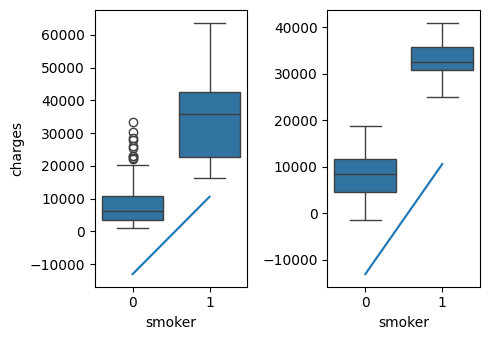

In [88]:
fig, axis = plt.subplots(1, 2, figsize = (5, 3.5))
total_data = pd.concat([df_train, df_test])

# We use the parameters adjusted in the training to draw the regression line in the plots
regression_equation = lambda x: -13050.535088002527 + 2.36478181e+04 * x

sns.boxplot(ax = axis[0], data = df_test, x = "smoker", y = "charges")
sns.lineplot(ax = axis[0], x = df_test["smoker"], y = regression_equation(df_test["smoker"]))
sns.boxplot(ax = axis[1], x = df_test["smoker"], y = y_pred)
sns.lineplot(ax = axis[1], x = df_test["smoker"], y = regression_equation(df_test["smoker"])).set(ylabel = None)

plt.tight_layout()

plt.show()

In [79]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 33635210.431178406
Coeficiente de determinación: 0.7833463107364539
